## UAS Analitika Media Sosial

NIM: **`A12.2020.06443`**

Nama: **`ISRO' RIZKY WIBOWO`**

Kelompok: **`A12.6503`**

### Load Library

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Instalasi

In [2]:
!pip install ekphrasis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### load eksprasis

In [3]:
from ekphrasis.classes.preprocessor import TextPreProcessor
from ekphrasis.classes.tokenizer import SocialTokenizer
from ekphrasis.dicts.emoticons import emoticons

text_processor = TextPreProcessor(
    # terms that will be normalized
    normalize=['email', 'percent', 'money', 'phone', 'user',
        'time', 'date', 'number'],
    # terms that will be annotated
    #annotate={"hashtag", "allcaps", "elongated", "repeated",'emphasis', 'censored'},
    annotate={"hashtag","allcaps","elongated","repeated",'emphasis','censored'},
    fix_html=True,  # fix HTML tokens
    
    # corpus from which the word statistics are going to be used 
    # for word segmentation 
    segmenter="twitter", 
    
    # corpus from which the word statistics are going to be used 
    # for spell correction
    corrector="twitter", 
    
    unpack_hashtags=True,  # perform word segmentation on hashtags
    unpack_contractions=True,  # Unpack contractions (can't -> can not)
    spell_correct_elong=False,  # spell correction for elongated words
    
    # select a tokenizer. You can use SocialTokenizer, or pass your own
    # the tokenizer, should take as input a string and return a list of tokens
    tokenizer=SocialTokenizer(lowercase=True).tokenize,
    
    # list of dictionaries, for replacing tokens extracted from the text,
    # with other expressions. You can pass more than one dictionaries.
    dicts=[emoticons]
)

/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/tokenizer.py:225: FutureWarning: Possible nested set at position 2190
  self.tok = re.compile(r"({})".format("|".join(pipeline)))


Reading twitter - 1grams ...
Reading twitter - 2grams ...


/usr/local/lib/python3.8/dist-packages/ekphrasis/classes/exmanager.py:14: FutureWarning: Possible nested set at position 42
  regexes = {k.lower(): re.compile(self.expressions[k]) for k, v in


Reading twitter - 1grams ...


### load library

In [4]:
import re
import string 
import pandas as pd
from copy import deepcopy

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


### load dataset

In [5]:
df = pd.read_excel('/content/drive/My Drive/PB_ROBOT.xlsx')

In [6]:
df.head()

,username,bintang,review
0,salonayu10,5,Alhamdulillah paketnya sudah sampai dgn aman P...
1,rubbyaqilla13,5,"Alhamdulillah, pesanan saya sudah sampai nih k..."
2,n*****1,2,"pertama kali aku kasih bintang di bwh 4, tpi e..."
3,erikatjhang,5,"Pengiriman sangat cepat, padahal belinya pas l..."
4,nandagiantari2002,5,"Jika ingin menghubungi layanan PLN 123, kamu d..."


Kita akan memakai kolom bintang dan review, maka kolom username dapat kita drop

In [7]:
df = df.drop(['username'], axis=1)

In [8]:
df.head()

,bintang,review
0,5,Alhamdulillah paketnya sudah sampai dgn aman P...
1,5,"Alhamdulillah, pesanan saya sudah sampai nih k..."
2,2,"pertama kali aku kasih bintang di bwh 4, tpi e..."
3,5,"Pengiriman sangat cepat, padahal belinya pas l..."
4,5,"Jika ingin menghubungi layanan PLN 123, kamu d..."


In [9]:
df['review'] = df['review'].apply(str)

## Preprocessing

### Setting Fungsi

In [10]:
def bersih_data(text):
    return " ".join(text_processor.pre_process_doc(text))

def non_ascii(text):
    return text.encode('ascii', 'replace').decode('ascii')

def remove_space(text):
    return " ".join(text.split())

def remove_emoji(text):
    return ' '.join(re.sub("([x#][A-Za-z0-9]+)"," ", text).split())

def remove_tab(text):
    return text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")

def remove_tab2(text):
    return re.sub('\s+',' ',text)

def remove_rt(text):
    return text.replace('RT'," ")

def remove_mention(text):
    return ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())

def remove_incomplete_url(text):
    return text.replace("http://", " ").replace("https://", " ")

def remove_single_char(text):
    return re.sub(r"\b[a-zA-Z]\b", "", text)

def change_stripe(text):
    return text.replace('-'," ")

def lower(text):
    return text.lower()

def remove_punctuation(text):
    remove = string.punctuation
    remove = remove.replace("_", "") # don't remove hyphens
    pattern = r"[{}]".format(remove) # create the pattern
    return re.sub(pattern, "", text) 

### Running Preprocessing

In [11]:
final_string = []
for text in df['review'].values:
    EachReviewText = ""
    proc = bersih_data(text)
    proc = lower(proc)
    proc = change_stripe(proc)
    proc = non_ascii(proc)
    proc = remove_emoji(proc)
    proc = remove_single_char(proc)
    proc = remove_punctuation(proc)
    proc = remove_space(proc)
    EachReviewText = proc
    final_string.append(EachReviewText)

masukkan hasil preprocessing ke kolom `step01`

In [12]:
df["step01"] = final_string

In [13]:
df.head()

,bintang,review,step01
0,5,Alhamdulillah paketnya sudah sampai dgn aman P...,alhamdulillah paketnya sudah sampai dgn aman p...
1,5,"Alhamdulillah, pesanan saya sudah sampai nih k...",alhamdulillah pesanan saya sudah sampai nih ka...
2,2,"pertama kali aku kasih bintang di bwh 4, tpi e...",pertama kali aku kasih bintang di bwh number t...
3,5,"Pengiriman sangat cepat, padahal belinya pas l...",pengiriman sangat cepat padahal belinya pas la...
4,5,"Jika ingin menghubungi layanan PLN 123, kamu d...",jika ingin menghubungi layanan allcaps pln all...


cek jumlah dataset

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3003 entries, 0 to 3002
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   bintang  3003 non-null   int64 
 1   review   3003 non-null   object
 2   step01   3003 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.5+ KB


### hapus record yang kosong

In [15]:
df_hapus = df[~df['step01'].str.contains(" ")]

In [16]:
df_new = df[~df.isin(df_hapus)].dropna()

In [17]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2898 entries, 0 to 3002
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bintang  2898 non-null   float64
 1   review   2898 non-null   object 
 2   step01   2898 non-null   object 
dtypes: float64(1), object(2)
memory usage: 90.6+ KB


### Tokenisasi

In [18]:
# Token

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [19]:
def word_tokenize_wrapper(text):
  return word_tokenize(text)

In [20]:
df_new['tokens'] = df['step01'].apply(word_tokenize_wrapper)

In [21]:
df_new.head(10)

,bintang,review,step01,tokens
0,5.0,Alhamdulillah paketnya sudah sampai dgn aman P...,alhamdulillah paketnya sudah sampai dgn aman p...,"[alhamdulillah, paketnya, sudah, sampai, dgn, ..."
1,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k...",alhamdulillah pesanan saya sudah sampai nih ka...,"[alhamdulillah, pesanan, saya, sudah, sampai, ..."
2,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e...",pertama kali aku kasih bintang di bwh number t...,"[pertama, kali, aku, kasih, bintang, di, bwh, ..."
3,5.0,"Pengiriman sangat cepat, padahal belinya pas l...",pengiriman sangat cepat padahal belinya pas la...,"[pengiriman, sangat, cepat, padahal, belinya, ..."
4,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d...",jika ingin menghubungi layanan allcaps pln all...,"[jika, ingin, menghubungi, layanan, allcaps, p..."
5,5.0,alhamdulillah sudah sampai. berfungsi dengan b...,alhamdulillah sudah sampai berfungsi dengan ba...,"[alhamdulillah, sudah, sampai, berfungsi, deng..."
6,5.0,Produknya sudah sampai dan bagus karena beli l...,produknya sudah sampai dan bagus karena beli l...,"[produknya, sudah, sampai, dan, bagus, karena,..."
7,5.0,"Maaf baru diriview, Packing aman, produknya ba...",maaf baru diriview packing aman produknya bagu...,"[maaf, baru, diriview, packing, aman, produkny..."
8,5.0,Maaf ga ada videonya soalnya sudah di yang pun...,maaf ga ada videonya soalnya sudah di yang pun...,"[maaf, ga, ada, videonya, soalnya, sudah, di, ..."
9,5.0,"Sukaa warnanya,, semoga bertahan lama lah yaa,...",sukaa warnanya semoga bertahan lama lah yaa se...,"[sukaa, warnanya, semoga, bertahan, lama, lah,..."


In [22]:
i=0
final_string_tokens = []
for text in df_new['tokens'].values:
    EachReviewText = ""
    EachReviewText = ' '.join(text)
    final_string_tokens.append(EachReviewText)

In [23]:
df_new["step02"] = final_string_tokens

In [24]:
df_new.head()

,bintang,review,step01,tokens,step02
0,5.0,Alhamdulillah paketnya sudah sampai dgn aman P...,alhamdulillah paketnya sudah sampai dgn aman p...,"[alhamdulillah, paketnya, sudah, sampai, dgn, ...",alhamdulillah paketnya sudah sampai dgn aman p...
1,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k...",alhamdulillah pesanan saya sudah sampai nih ka...,"[alhamdulillah, pesanan, saya, sudah, sampai, ...",alhamdulillah pesanan saya sudah sampai nih ka...
2,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e...",pertama kali aku kasih bintang di bwh number t...,"[pertama, kali, aku, kasih, bintang, di, bwh, ...",pertama kali aku kasih bintang di bwh number t...
3,5.0,"Pengiriman sangat cepat, padahal belinya pas l...",pengiriman sangat cepat padahal belinya pas la...,"[pengiriman, sangat, cepat, padahal, belinya, ...",pengiriman sangat cepat padahal belinya pas la...
4,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d...",jika ingin menghubungi layanan allcaps pln all...,"[jika, ingin, menghubungi, layanan, allcaps, p...",jika ingin menghubungi layanan allcaps pln all...


### Stemming - Menggunakan Sastrawi

In [25]:
!pip install sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 4.0 MB/s 


In [26]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [27]:
final_string = []
s = ""
for sentence in df_new["step02"].values:
    filteredSentence = []
    EachReviewText = ""
    s = (stemmer.stem(sentence))
    filteredSentence.append(s)
    
    EachReviewText = ' '.join(filteredSentence)
    final_string.append(EachReviewText)

In [28]:
df_new["ProcessedText"] = final_string

In [29]:
df_new.head(10)

,bintang,review,step01,tokens,step02,ProcessedText
0,5.0,Alhamdulillah paketnya sudah sampai dgn aman P...,alhamdulillah paketnya sudah sampai dgn aman p...,"[alhamdulillah, paketnya, sudah, sampai, dgn, ...",alhamdulillah paketnya sudah sampai dgn aman p...,alhamdulillah paket sudah sampai dgn aman prod...
1,5.0,"Alhamdulillah, pesanan saya sudah sampai nih k...",alhamdulillah pesanan saya sudah sampai nih ka...,"[alhamdulillah, pesanan, saya, sudah, sampai, ...",alhamdulillah pesanan saya sudah sampai nih ka...,alhamdulillah pesan saya sudah sampai nih ka d...
2,2.0,"pertama kali aku kasih bintang di bwh 4, tpi e...",pertama kali aku kasih bintang di bwh number t...,"[pertama, kali, aku, kasih, bintang, di, bwh, ...",pertama kali aku kasih bintang di bwh number t...,pertama kali aku kasih bintang di bwh number t...
3,5.0,"Pengiriman sangat cepat, padahal belinya pas l...",pengiriman sangat cepat padahal belinya pas la...,"[pengiriman, sangat, cepat, padahal, belinya, ...",pengiriman sangat cepat padahal belinya pas la...,kirim sangat cepat padahal beli pas lagi event...
4,5.0,"Jika ingin menghubungi layanan PLN 123, kamu d...",jika ingin menghubungi layanan allcaps pln all...,"[jika, ingin, menghubungi, layanan, allcaps, p...",jika ingin menghubungi layanan allcaps pln all...,jika ingin hubung layan allcaps pln allcaps nu...
5,5.0,alhamdulillah sudah sampai. berfungsi dengan b...,alhamdulillah sudah sampai berfungsi dengan ba...,"[alhamdulillah, sudah, sampai, berfungsi, deng...",alhamdulillah sudah sampai berfungsi dengan ba...,alhamdulillah sudah sampai fungsi dengan baikk...
6,5.0,Produknya sudah sampai dan bagus karena beli l...,produknya sudah sampai dan bagus karena beli l...,"[produknya, sudah, sampai, dan, bagus, karena,...",produknya sudah sampai dan bagus karena beli l...,produk sudah sampai dan bagus karena beli lang...
7,5.0,"Maaf baru diriview, Packing aman, produknya ba...",maaf baru diriview packing aman produknya bagu...,"[maaf, baru, diriview, packing, aman, produkny...",maaf baru diriview packing aman produknya bagu...,maaf baru diriview packing aman produk bagus t...
8,5.0,Maaf ga ada videonya soalnya sudah di yang pun...,maaf ga ada videonya soalnya sudah di yang pun...,"[maaf, ga, ada, videonya, soalnya, sudah, di, ...",maaf ga ada videonya soalnya sudah di yang pun...,maaf ga ada video soal sudah di yang punya pow...
9,5.0,"Sukaa warnanya,, semoga bertahan lama lah yaa,...",sukaa warnanya semoga bertahan lama lah yaa se...,"[sukaa, warnanya, semoga, bertahan, lama, lah,...",sukaa warnanya semoga bertahan lama lah yaa se...,sukaa warna moga tahan lama lah yaa moga gak c...


### Simpan hasil preprocessing

In [30]:
df_new.to_csv('/content/drive/My Drive/clean_dataset_PB_ROBOT.csv',sep=";")

### Penataan data

In [31]:
import pandas as pd
import numpy as np

In [32]:
dataset = pd.read_csv('/content/drive/My Drive/clean_dataset_PB_ROBOT.csv',sep=";")

In [33]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2898 entries, 0 to 2897
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     2898 non-null   int64  
 1   bintang        2898 non-null   float64
 2   review         2898 non-null   object 
 3   step01         2898 non-null   object 
 4   tokens         2898 non-null   object 
 5   step02         2898 non-null   object 
 6   ProcessedText  2898 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 158.6+ KB


In [34]:
dataset_feature = dataset['ProcessedText'].astype(str)

In [35]:
dataset_feature.head()

0    alhamdulillah paket sudah sampai dgn aman prod...
1    alhamdulillah pesan saya sudah sampai nih ka d...
2    pertama kali aku kasih bintang di bwh number t...
3    kirim sangat cepat padahal beli pas lagi event...
4    jika ingin hubung layan allcaps pln allcaps nu...
Name: ProcessedText, dtype: object

In [36]:
dataset_label = dataset['bintang']

In [37]:
dataset_label.head()

0    5.0
1    5.0
2    2.0
3    5.0
4    5.0
Name: bintang, dtype: float64

### Ekstraksi Fitur dan Machine Learning

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split

In [39]:
train_x, test_x, train_label, test_label = train_test_split(dataset_feature, dataset_label, test_size = 0.3, random_state=42)

#### Load TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_Vectorizer = TfidfVectorizer()

### Naive Bayes Model

In [41]:
from sklearn.naive_bayes import MultinomialNB

In [42]:
from sklearn.pipeline import Pipeline
classifier_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('model', MultinomialNB()),
])

In [43]:
parameters_nb = { 
               'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3), (1, 4)],
               #'tfidf__use_idf': (True, False),
               'model__alpha': (0, 1, 1e-2, 1e-3)
}

In [44]:
classifier_nb = GridSearchCV(classifier_nb, parameters_nb, cv = 3, n_jobs=-1)

In [45]:
classifier_nb.fit(train_x, train_label.ravel())

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('tfidf', TfidfVectorizer()),
                                       ('model', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'model__alpha': (0, 1, 0.01, 0.001),
                         'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3),
                                                (1, 4)]})

In [46]:
y_pred_nb_train = classifier_nb.predict(train_x)
accuracy_nb_train = accuracy_score(train_label, y_pred_nb_train)
print("Accuracy Training set: ", accuracy_nb_train)

y_pred_nb_test = classifier_nb.predict(test_x)
accuracy_nb_test = accuracy_score(test_label, y_pred_nb_test)
print("Accuracy Test set: ", accuracy_nb_test)

Accuracy Training set:  0.908284023668639
Accuracy Test set:  0.9091954022988505


In [47]:
recall_nb_train = recall_score(train_label, y_pred_nb_train, average='weighted')
print("Recall Training set: ", recall_nb_train)

recall_nb_test = recall_score(test_label, y_pred_nb_test, average='weighted')
print("Recall Test set: ", recall_nb_test)

Recall Training set:  0.908284023668639
Recall Test set:  0.9091954022988505


In [48]:
precision_nb_train = precision_score(train_label, y_pred_nb_train, average='weighted')
print("Precision Training set: ", precision_nb_train)

precision_nb_test = precision_score(test_label, y_pred_nb_test, average='weighted')
print("Precision Test set: ", precision_nb_test)

Precision Training set:  0.8615885500330029
Precision Test set:  0.8266362795613686


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
f1_nb_train = f1_score(train_label, y_pred_nb_train, average='weighted')
print("F1 Training set: ", f1_nb_train)

f1_nb_test = f1_score(test_label, y_pred_nb_test, average='weighted')
print("F1 Test set: ", f1_nb_test)

F1 Training set:  0.8655804467896484
F1 Test set:  0.8659525144110666


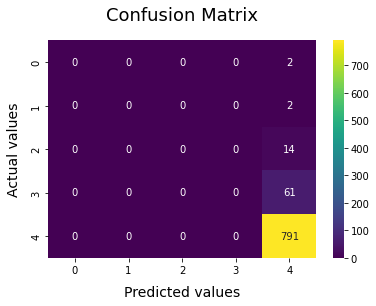

In [50]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(test_label, y_pred_nb_test), annot=True, cmap = 'viridis', fmt='.0f')
plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
plt.show()

In [51]:
classifier_nb.best_estimator_

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('model', MultinomialNB(alpha=1))])

In [52]:
for param_name in sorted(parameters_nb.keys()):
    print("%s: %r" % (param_name, classifier_nb.best_params_[param_name]))

model__alpha: 1
tfidf__ngram_range: (1, 1)


### Visualisasi

In [53]:
models = [        
          ('Naive Bayes Multinomial', accuracy_nb_train, accuracy_nb_test),
         ]

In [54]:
predict = pd.DataFrame(data = models, columns=['Model', 'Training Accuracy', 'Test Accuracy'])
predict

,Model,Training Accuracy,Test Accuracy
0,Naive Bayes Multinomial,0.908284,0.909195


In [55]:
models_comparison = [                        
                        ('Naive Bayes Multinomial', accuracy_nb_test, recall_nb_test, precision_nb_test, f1_nb_test)                      
                    ]

In [56]:
comparison = pd.DataFrame(data = models_comparison, columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1 Weighted'])
comparison

,Model,Accuracy,Recall,Precision,F1 Weighted
0,Naive Bayes Multinomial,0.909195,0.909195,0.826636,0.865953


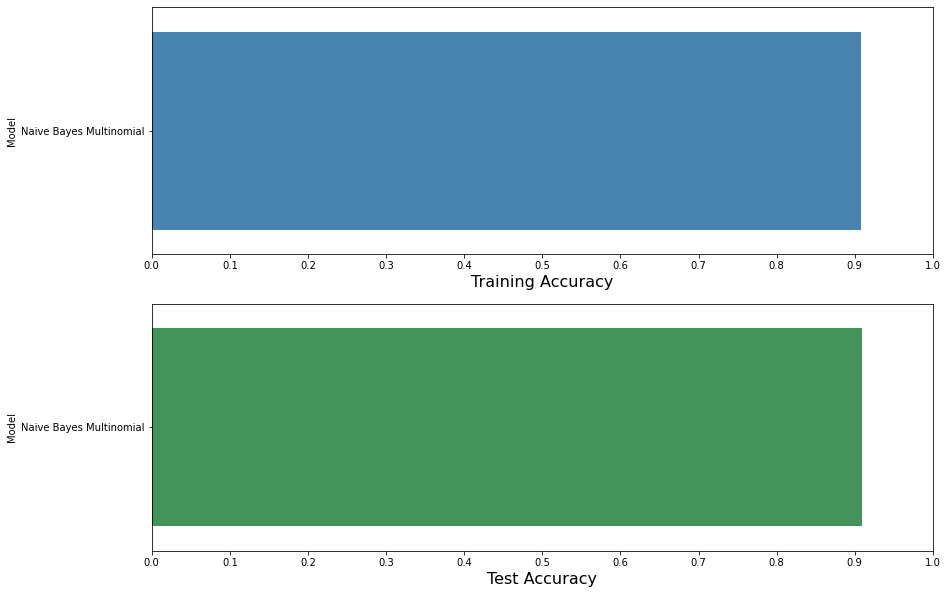

In [57]:
import numpy as np

f, axes = plt.subplots(2,1, figsize=(14,10))

predict.sort_values(by=['Training Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Training Accuracy', y='Model', data = predict, palette='Blues_d', ax = axes[0])
axes[0].set_xlabel('Training Accuracy', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Test Accuracy'], ascending=False, inplace=True)

sns.barplot(x='Test Accuracy', y='Model', data = predict, palette='Greens_d', ax = axes[1])
axes[1].set_xlabel('Test Accuracy', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()